## Dimensionality Reduction and Manifold Learning

In machine learning problems, we often encounter datasets with a very large number of dimensions (features or columns). Dimensionality reduction techniques are used to reduce the number of dimensions or features within the data to a manageable or convenient number. 


Applications of dimensionality reduction:

* Reducing size of data without loss of information
* Training machine learning models efficiently
* Visualizing high-dimensional data in 2/3 dimensions



### Principal Component Analysis (PCA)

Principal component is a dimensionality reduction technique that uses linear projections of data to reduce their dimensions, while attempting to maximize the variance of data in the projection. Watch this video to learn how PCA works: https://www.youtube.com/watch?v=FgakZw6K1QQ

Here's an example of PCA to reduce 2D data to 1D:

<img src="https://i.imgur.com/ZJ7utlo.png" width="480">

Here's an example of PCA to reduce 3D data to 2D:

<img src="https://lihan.me/assets/images/pca-illustration.png" width="640">


Let's apply Principal Component Analysis to the Iris dataset.

Principal Component Analysis, or more commonly known as PCA, is a way to reduce the number of variables while maintaining the majority of the important information. It transforms a number of variables that may be correlated into a smaller number of uncorrelated variables, known as principal components. The principal components are linear combinations of the original variables weighted by their variances (or eigenvalues) in a particular orthogonal dimension. The main objective of PCA is to simplify your model features into fewer components to help visualize patterns in your data and to help your model run faster. Using PCA also reduces the chance of overfitting your model by eliminating features with high correlation.

It is important to note that you should only apply PCA to continuous variables, not categorical. Although technically you can use PCA on one-hot encoded or otherwise binary data, it does not work very well. This is because PCA is designed to minimize variance (squared deviations) which is not very meaningful when performed on binary variables. If you have mixed data, alternative methods like MCA may work better

In [1]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
sns.set_style('darkgrid')

In [2]:
iris_df=sns.load_dataset('iris')
iris_df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [3]:
numeric_cols=['sepal_length', 'sepal_width', 'petal_length', 'petal_width']

In [4]:
X=iris_df[numeric_cols]

In [5]:
from sklearn.decomposition import PCA

In [6]:
?PCA

In [7]:
pca=PCA(n_components=2)

In [8]:
pca.fit(X)

PCA(n_components=2)

In [9]:
transformed=pca.transform(iris_df[numeric_cols])

In [10]:
?transformed

<AxesSubplot:>

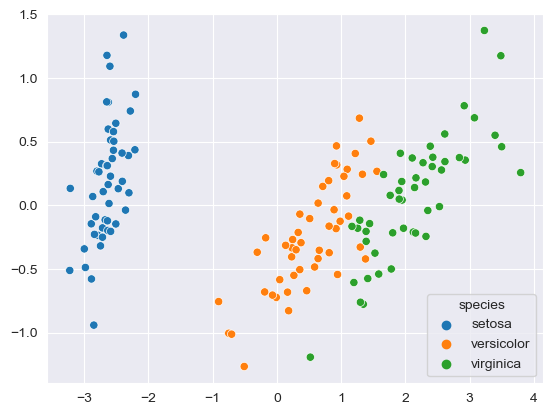

In [11]:
sns.scatterplot(x=transformed[:,0],y=transformed[:,1],hue=iris_df['species'])

### t-Distributed Stochastic Neighbor Embedding (t-SNE)

Manifold learning is an approach to non-linear dimensionality reduction. Algorithms for this task are based on the idea that the dimensionality of many data sets is only artificially high. Scikit-learn provides many algorithms for manifold learning: https://scikit-learn.org/stable/modules/manifold.html . A commonly-used manifold learning technique is t-Distributed Stochastic Neighbor Embedding or t-SNE, used to visualize high dimensional data in one, two or three dimensions. 

Here's a visual representation of t-SNE applied to visualize 2 dimensional data in 1 dimension:

<img src="https://i.imgur.com/rVMAaix.png" width="360">


Here's a visual representation of t-SNE applied to the MNIST dataset, which contains 28px x 28px images of handrwritten digits 0 to 9, a reduction from 784 dimensions to 2 dimensions ([source](https://colah.github.io/posts/2014-10-Visualizing-MNIST/)):

<img src="https://indico.io/wp-content/uploads/2015/08/mnist-1024x607-1.jpg" width="640">

Here's a video explaning how t-SNE works: https://www.youtube.com/watch?v=NEaUSP4YerM

In [12]:
from sklearn.manifold import TSNE

In [13]:
tsne=TSNE(n_components=2)

In [14]:
transformed=tsne.fit_transform(X)

C:\Users\KIIT\anaconda3\envs\tf\lib\site-packages\sklearn\manifold\_t_sne.py:795: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\KIIT\anaconda3\envs\tf\lib\site-packages\sklearn\manifold\_t_sne.py:805: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


<AxesSubplot:>

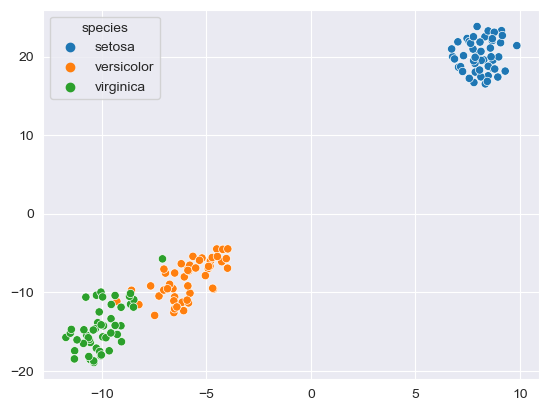

In [15]:
sns.scatterplot(x=transformed[:,0],y=transformed[:,1],hue=iris_df['species'])

# Dimensionality in MNIST

In [46]:
import opendatasets as od

In [47]:
od.download('https://www.kaggle.com/competitions/digit-recognizer/data')

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: rimoghosh
Your Kaggle Key: ········


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 15.3M/15.3M [00:08<00:00, 1.85MB/s]



Extracting archive .\digit-recognizer/digit-recognizer.zip to .\digit-recognizer


In [50]:
import os
dir='digit-recognizer'
os.listdir(dir)

['sample_submission.csv', 'test.csv', 'train.csv']

In [52]:
import pandas as pd
train_df=pd.read_csv(dir+'/train.csv')
train_df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [55]:
label=train_df['label']
train_df.drop('label',axis=1)

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [60]:
train=train_df.to_numpy()
train.shape

(42000, 785)

In [70]:
transform=tsne.fit_transform(train)

C:\Users\KIIT\anaconda3\envs\tf\lib\site-packages\sklearn\manifold\_t_sne.py:795: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\KIIT\anaconda3\envs\tf\lib\site-packages\sklearn\manifold\_t_sne.py:805: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


In [92]:
pca.fit(train)

PCA(n_components=2)

In [93]:
transformed=pca.transform(train)

Text(0.5, 1.0, 'PCA')

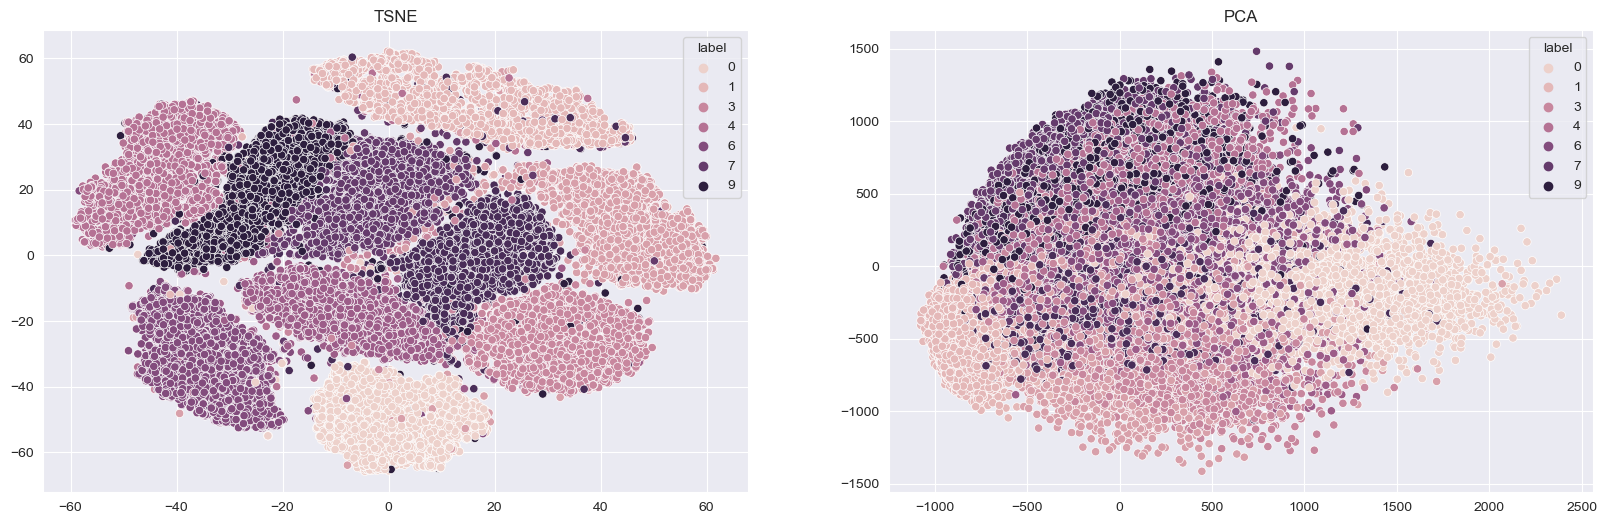

In [94]:
fig,ax=plt.subplots(1,2,figsize=(20,6))
sns.scatterplot(x=transform[:,0],y=transform[:,1],hue=label,ax=ax[0])
sns.scatterplot(x=transformed[:,0],y=transformed[:,1],hue=label,ax=ax[1])
ax[0].set_title('TSNE')
ax[1].set_title('PCA')